Task 5: Strategy Backtesting is basically the “proof in the pudding” step, where we see if all the forecasting and optimization from earlier tasks actually pays off when simulated on historical data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [9]:

# ---------------------------
# 1. Download historical prices
# ---------------------------
# Download historical prices
tickers = ["TSLA", "SPY", "BND"]
start_date = "2024-08-01"
end_date = "2025-07-31"

prices = yf.download(tickers, start=start_date, end=end_date)
#print(prices.columns)
prices = prices['Close']  # Select the 'Adj Close' level from the multi-index columns

C:\Users\user\AppData\Local\Temp\ipykernel_13608\1951365568.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


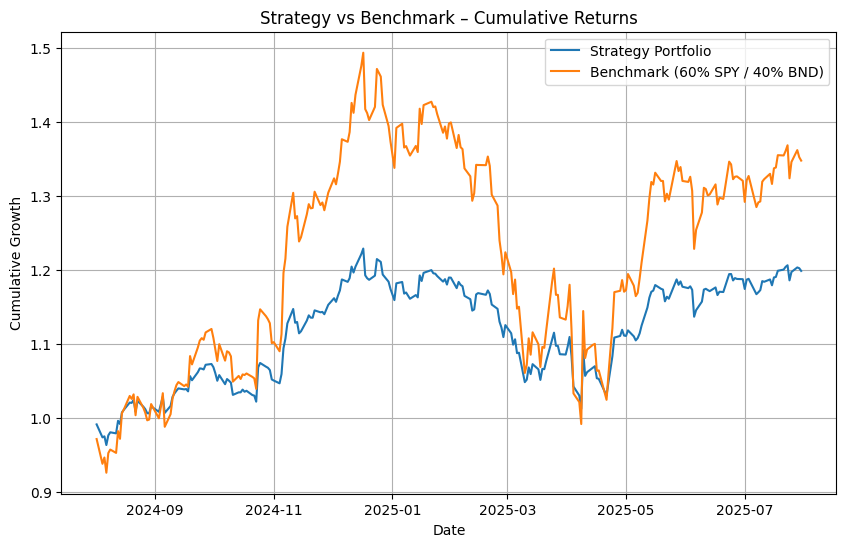

===== Performance Summary =====
Strategy Total Return: 19.89%
Strategy Sharpe Ratio: 1.05
Benchmark Total Return: 34.79%
Benchmark Sharpe Ratio: 0.99

 Strategy underperformed the benchmark.


In [10]:


# ---------------------------
# 2. Calculate daily returns
# ---------------------------
returns = prices.pct_change().dropna()

# ---------------------------
# 3. Define strategy & benchmark weights
# ---------------------------
# Replace these with Task 4 optimal weights
strategy_weights = np.array([0.50, 0.30, 0.20])  # [TSLA, SPY, BND]

# Benchmark: 60% SPY / 40% BND
benchmark_weights = np.array([0.0, 0.60, 0.40])

# ---------------------------
# 4. Compute portfolio returns
# ---------------------------
strategy_daily_returns = (returns * strategy_weights).sum(axis=1)
benchmark_daily_returns = (returns * benchmark_weights).sum(axis=1)

# ---------------------------
# 5. Calculate cumulative returns
# ---------------------------
strategy_cum = (1 + strategy_daily_returns).cumprod()
benchmark_cum = (1 + benchmark_daily_returns).cumprod()

# ---------------------------
# 6. Performance metrics
# ---------------------------
def sharpe_ratio(daily_returns, risk_free_rate=0.0):
    return (daily_returns.mean() - risk_free_rate) / daily_returns.std() * np.sqrt(252)

strategy_sharpe = sharpe_ratio(strategy_daily_returns)
benchmark_sharpe = sharpe_ratio(benchmark_daily_returns)

strategy_total_return = strategy_cum.iloc[-1] - 1
benchmark_total_return = benchmark_cum.iloc[-1] - 1

# ---------------------------
# 7. Plot performance
# ---------------------------
plt.figure(figsize=(10, 6))
plt.plot(strategy_cum, label="Strategy Portfolio")
plt.plot(benchmark_cum, label="Benchmark (60% SPY / 40% BND)")
plt.title("Strategy vs Benchmark – Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# 8. Summary
# ---------------------------
print("===== Performance Summary =====")
print(f"Strategy Total Return: {strategy_total_return:.2%}")
print(f"Strategy Sharpe Ratio: {strategy_sharpe:.2f}")
print(f"Benchmark Total Return: {benchmark_total_return:.2%}")
print(f"Benchmark Sharpe Ratio: {benchmark_sharpe:.2f}")

if strategy_total_return > benchmark_total_return:
    print("\n Strategy outperformed the benchmark.")
else:
    print("\n Strategy underperformed the benchmark.")
